<a href="https://colab.research.google.com/github/VanshKodarlikar/Predictive_Maintenance_for_Manufacturing/blob/main/Predictive_Maintenance_for_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df=pd.read_csv("/content/predictive_maintenance_sample.csv")
df.head()

,timestamp,machine_id,vibration,temperature,pressure,humidity,voltage,rotation_speed,failure
0,2025-01-01 00:00:00,7,0.634170,59.461070,36.362703,33.066121,231.548151,1505.445230,0
1,2025-01-01 01:00:00,20,0.266935,90.665091,23.377667,37.284818,227.561678,1930.694486,0
2,2025-01-01 02:00:00,15,0.608593,82.394095,29.451871,37.180418,219.269000,1254.338904,0
3,2025-01-01 03:00:00,11,0.605522,70.943116,30.664293,38.967570,209.646241,1003.536963,0
4,2025-01-01 04:00:00,8,0.500045,81.164221,25.966148,37.657101,225.805281,1261.200685,0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day

In [ ]:
X = df.drop(['timestamp', 'machine_id', 'failure'], axis=1)
y = df['failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_preds = rf_model.predict(X_test)

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:18:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_preds = xgb_model.predict(X_test)

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

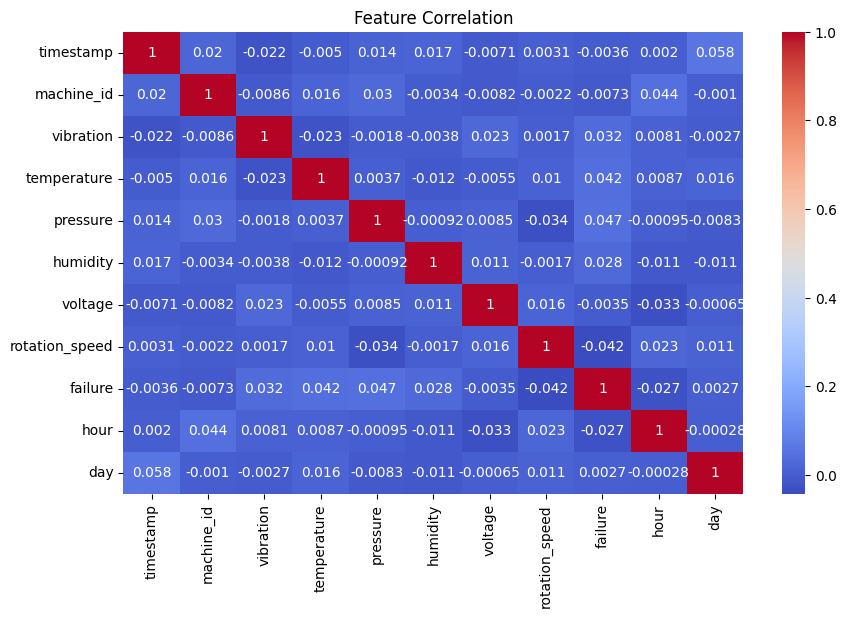

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()